In [1]:
from sklearn.datasets import load_iris
# 1. 数据加载
data = load_iris()

In [2]:
# 2. 标准化处理
from sklearn.preprocessing import StandardScaler
model_ss = StandardScaler().fit(data['data'])
data_ss = model_ss.transform(data['data']) # 获得标准化处理后的数据集

In [3]:
# 3. 构建聚类模型并训练
from sklearn.cluster import DBSCAN
model = DBSCAN().fit(data_ss) # 训练
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1],
      dtype=int64)

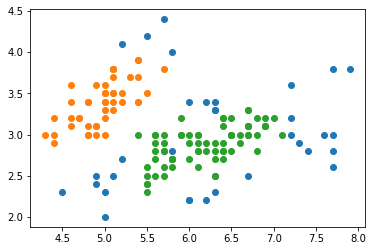

In [6]:
# 4. 聚类效果可视化展示
import matplotlib.pyplot as plt
# 将聚类后的结果可视化成散点图
for i in [-1, 0, 1]:
    # 注：iris数据集 每个样本共四个属性，分别是：花萼长度，花萼宽度，花瓣长度，花瓣宽度
    # 这里提取出每一类的第0列和第1列作为x和y，即提取的是花萼长度，花萼宽度，也可以提取2和3列，效果大致相同
    plt.scatter(data['data'][model.labels_ == i, 0], data['data'][model.labels_ == i, 1]) # x轴和y轴
plt.show() # 可以对比之前学的KMeans模型，发现DBSCAN这样得到的模型还不如KMeans模型
# 因此可以选择对DBSCAN模型调参进行调优

In [5]:
# 5. 对模型进行评估
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(data['target'], model.labels_) # ARI评价法(兰德系数) 越接近1越好

0.44209866858859237